In [1]:
  import dash
  from dash import dcc, html
  import plotly.express as px
  import pandas as pd

  # Sample data
  data = pd.DataFrame({
      "Study": ["Padron 2016-2", "Twardella 2010-2", "Tiesler 2011", "Li 2018 (Q2)", "Li 2018 (Q3)",
                "Li 2018 (Q4)", "Tewar 2016-5", "Won 2016-5", "Won 2016-8", "Hu 2017-6"],
      "Chemical": ["SHS", "SHS", "SHS", "BPA", "BPA", "BPA", "BPA", "Phthalates", "Phthalates", "Phthalates"],
      "OddsRatio": [3.14, 2.39, 1.59, 1.79, 7.44, 9.41, 10.48, 3.03, 3.03, 1.82],
      "CI_Lower": [1.63, 1.62, 1.11, 1.12, 4.12, 4.91, 2.87, 1.45, 1.45, 1.01],
      "CI_Upper": [6.04, 3.53, 2.27, 2.78, 9.18, 18.1, 38.2, 6.30, 6.30, 3.29]
  })
  data["error_upper"] = data["CI_Upper"] - data["OddsRatio"]
  data["error_lower"] = data["OddsRatio"] - data["CI_Lower"]

  # Dash app
  app = dash.Dash(__name__)

  fig = px.scatter(
      data,
      x="Study",
      y="OddsRatio",
      color="Chemical",
      error_y="error_upper",
      error_y_minus="error_lower",
      title="ADHD Risk by Chemical Exposure (Odds Ratios with 95% CI)",
      labels={"OddsRatio": "Odds Ratio"},
      template="plotly_white"
  )

  app.layout = html.Div([
      html.H1("ADHD Risk and Environmental Exposure Dashboard"),
      dcc.Graph(figure=fig),
      html.P("Visualizes Odds Ratios from studies linking ADHD with BPA, SHS, and phthalates.")
  ])

  if __name__ == "__main__":
      app.run(debug=True)
  

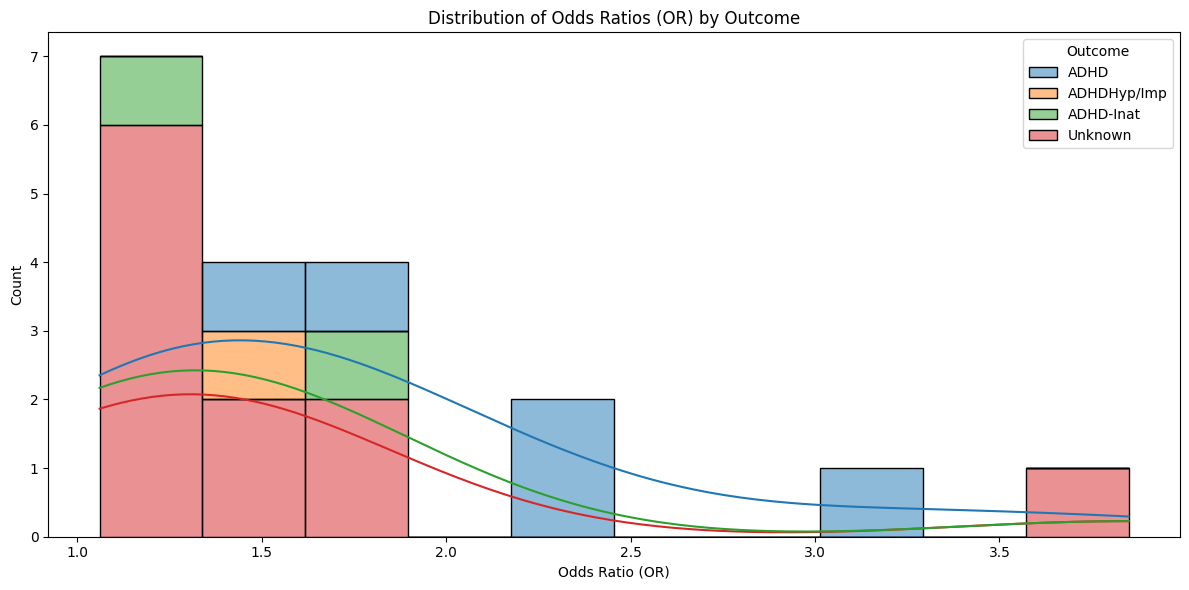

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "Study": [ 
        "Tiesler 2011-1", "Desrosiers 2013-2", "Padron 2016-1", "Padron 2016-2", "Tawardella 2010-2", 
        "Tawardella 2010-1", "Joo 2017-2", "Joo 2017-1", "Cho 2013-3","Cho 2013-6",
        "Joo 2017-8", "Joo 2017-7", "Cho 2013-2", "Cho 2013-5", "Cho 2013-1", "Cho 2013-4", 
        "Desrosiers 2013-1", "Joo 2017-5", "Joo 2017-4" 
    ], 
    "Outcome": [ 
        "ADHD", "ADHD", "ADHD", "ADHD", "ADHD", 
        "ADHDHyp/Imp", "ADHD-Inat", "ADHD-Inat", "Unknown", "Unknown",
        "Unknown", "Unknown", "Unknown", "Unknown", "Unknown", "Unknown",
        "Unknown", "Unknown", "Unknown"
    ], 
    "n": [ 
        374, 255, 2357, 2357, 5494, 
        5494, 426, 428, 885, 885, 
        116, 118, 885, 885, 885, 885, 
        253, 310, 310 
    ], 
    "OR": [ 
        1.59, 1.84, 2.18, 3.14, 2.39,
        1.35, 1.83, 1.10, 1.68, 1.73, 
        3.85, 1.06, 1.34, 1.22, 1.26, 1.42, 
        1.15, 1.27, 1.11 
    ]
} 
 
# Create DataFrame 
df = pd.DataFrame(data) 
 
# Plotting 
plt.figure(figsize=(12, 6)) 
sns.histplot(data=df, x="OR", hue="Outcome", bins=10, kde=True, multiple="stack") 
plt.title("Distribution of Odds Ratios (OR) by Outcome") 
plt.xlabel("Odds Ratio (OR)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
